# Passes location

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Arc
import seaborn as sns
%matplotlib inline


### Let import statsbomb dataset :


In [2]:
from statsbombpy import sb

In [3]:
# let's check all the competitions of our Dataset
sb.competitions().head(5)

/opt/conda/lib/python3.7/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
# Let's take the 2010-2011 champoins league final match:
sb.matches(16,22)

/opt/conda/lib/python3.7/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18236,2011-05-28,20:45:00.000,Europe - Champions League,2010/2011,Barcelona,Manchester United,3,1,available,...,2021-06-13T16:17:31.694,1,Final,Wembley Stadium,Viktor Kassai,Josep Guardiola i Sala,Alex Ferguson,1.0.3,None,None


In [5]:
# the match events :
bar_vs_manu = sb.events(18236)
bar_vs_manu.sample(5)

/opt/conda/lib/python3.7/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
2461,NaN,NaN,NaN,NaN,NaN,"[91.0, 66.0]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:04:50.801,Carry,NaN
1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:44:35.758,Ball Receipt*,NaN
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:44:37.297,Pass,NaN
3649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:37:18.378,Pressure,NaN
3693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:02:24.697,Pressure,NaN


In [6]:
# check dataframe columns:
bar_vs_manu.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

### Display number of dangers passes made by Barcelona

In [7]:
match_id_required = [18236]
team_required = "Barcelona"

In [8]:
for ic,match_id in enumerate(match_id_required):
    
    #Load in all match events 
    
    team_actions = (bar_vs_manu['team']==team_required)
    
    
    #A dataframe of passes
    passes_match = bar_vs_manu[bar_vs_manu['type'] == 'Pass'].set_index('id')
    #A dataframe of shots
    shots_match = bar_vs_manu[bar_vs_manu['type'] == 'Shot'].set_index('id')
    
    #Find shot times in seconds
    #This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_match['minute']*60+shots_match['second']
    pass_times = passes_match['minute']*60+passes_match['second']
    
    shot_window = 15  
    shot_start = shot_times - shot_window
    
    
    #Check with passes are whitin [shot_window] seconds of a shot
    
    def in_range(pass_time,start,finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x,shot_start,shot_times))
    
    #Exclude corners
    iscorner = passes_match['pass_type']=='Corner'
    
    danger_passes=passes_match[np.logical_and(pass_to_shot,np.logical_not(iscorner))]
    
    if ic==0:
        passes =  danger_passes
    else:
        passes = passes.append(danger_passes)

    
    
    print('Match: ' + str(match_id) +': '+ team_required +' The Number of danger passes is: ' + str(len(danger_passes)))

Match: 18236: Barcelona The Number of danger passes is: 114


### Plotting the passes location & heat map for a team

In [9]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

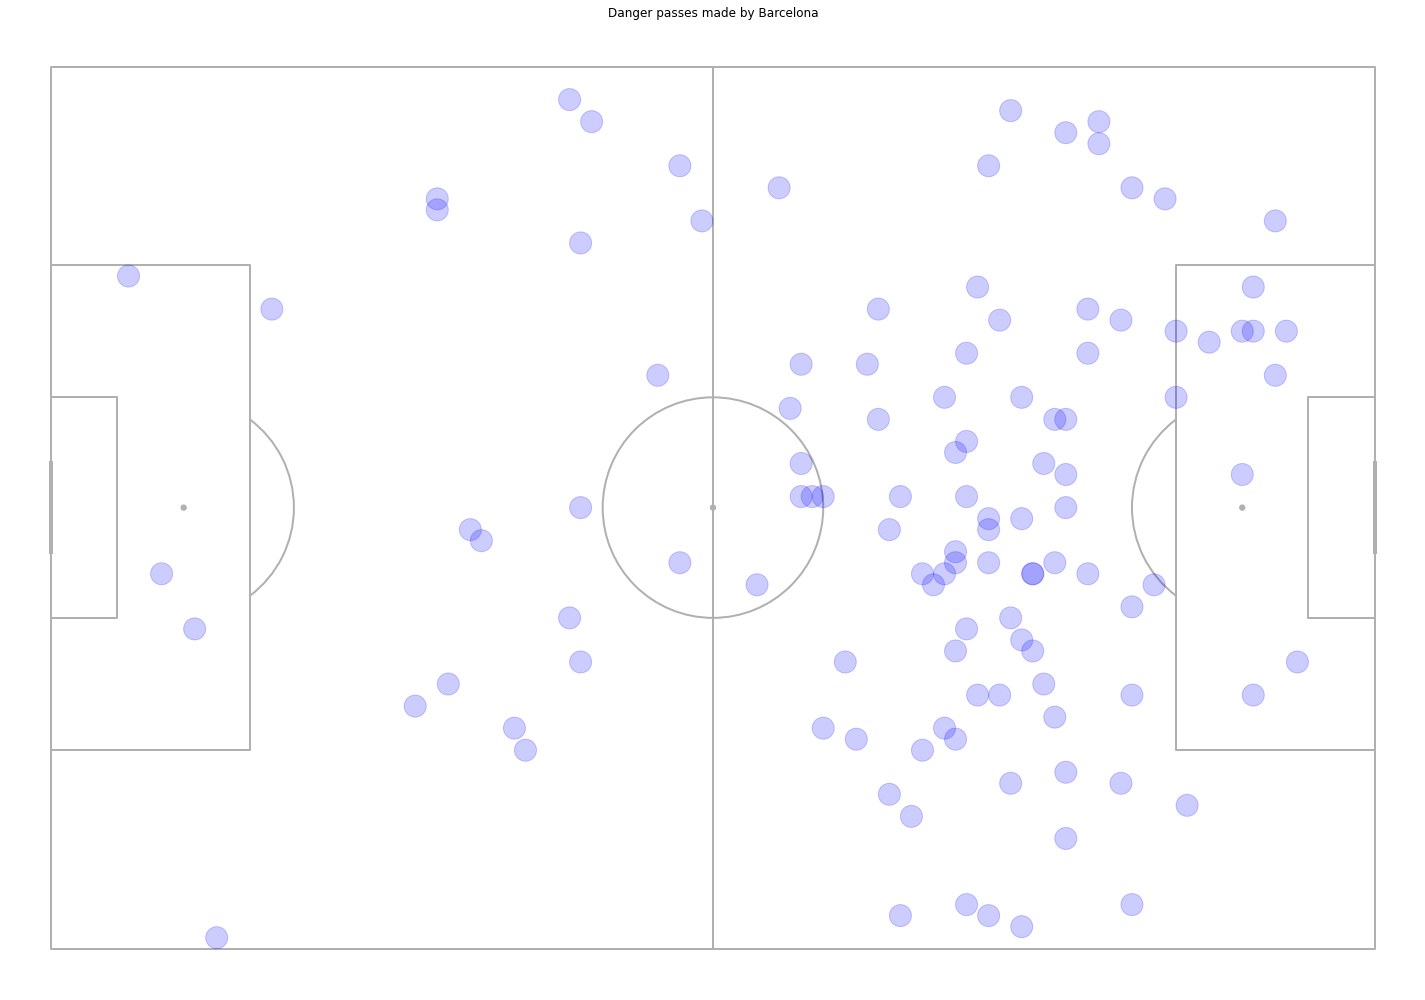

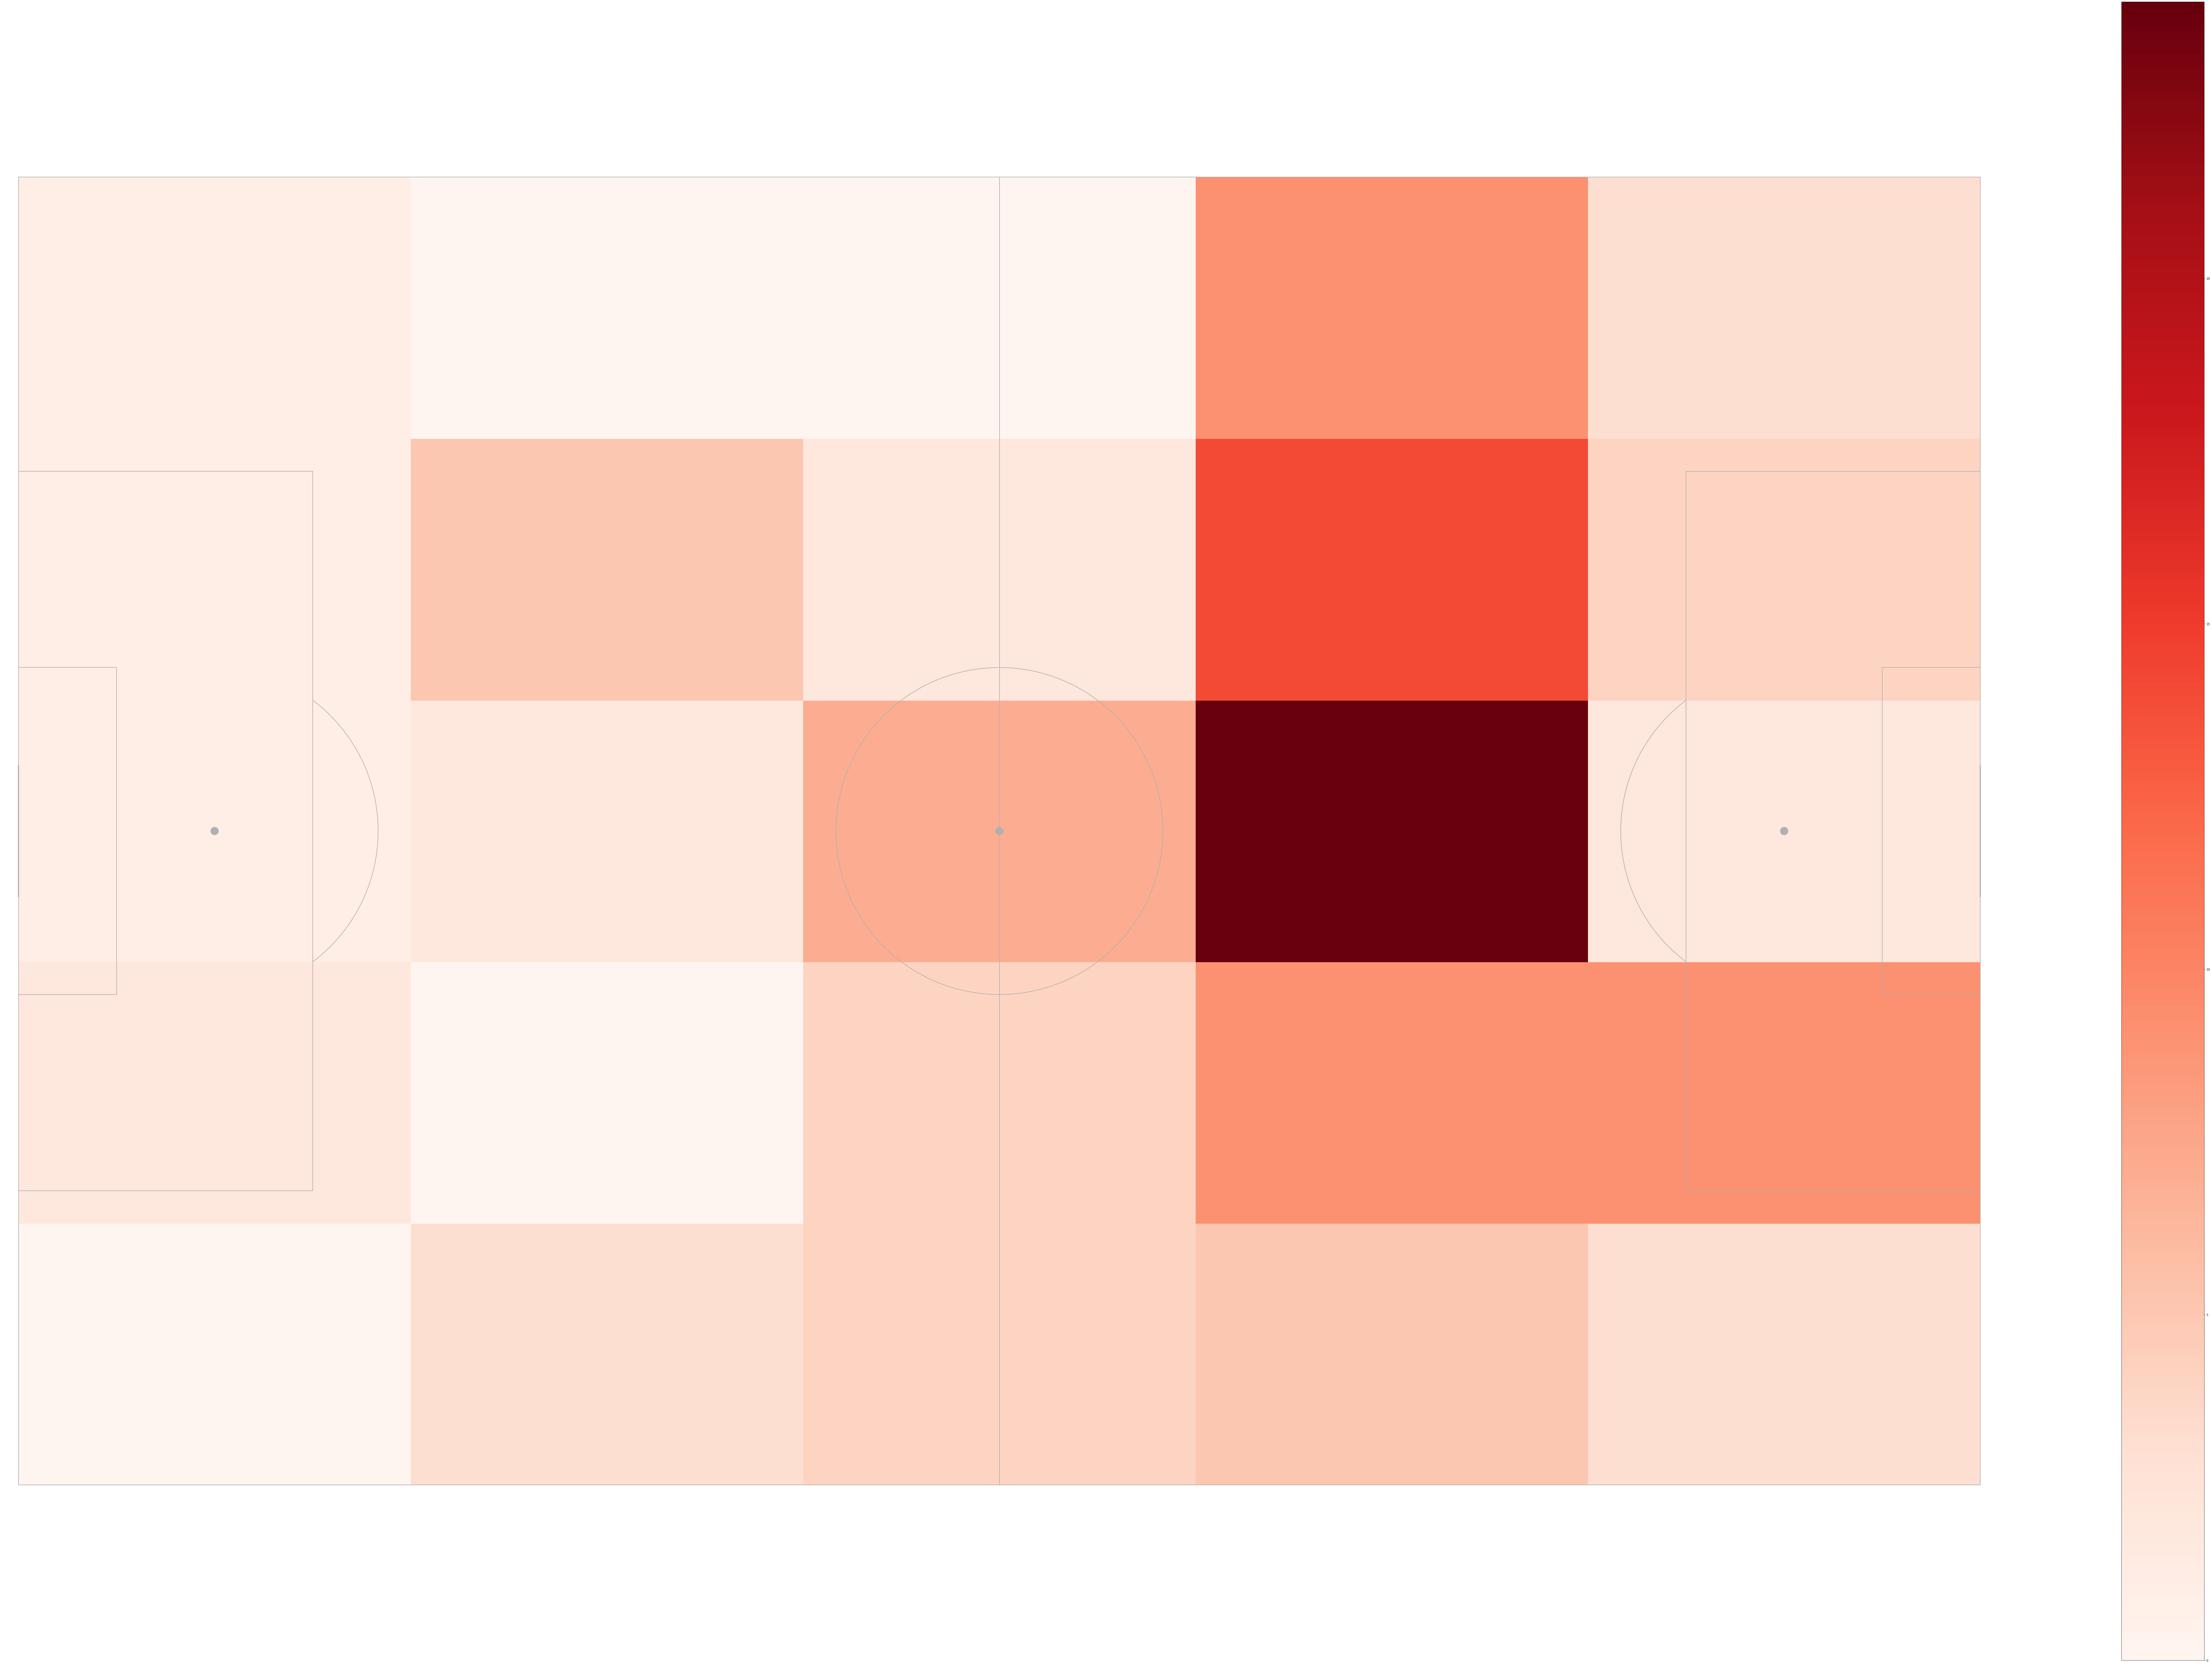

In [10]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('Danger passes made by ' + team_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + team_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Dangerous Passes made by Player

In [11]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    
    #A dataframe of passes
    passes_player = player_actions[player_actions['type'] == 'Pass'].set_index('id')
    #A dataframe of shots
    shots_player = player_actions[player_actions['type'] == 'Shot'].set_index('id')
    
    #Find shot times in seconds
    #This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_player['minute']*60+shots_player['second']
    pass_times = passes_player['minute']*60+passes_player['second']
    
    shot_window = 15  
    shot_start = shot_times - shot_window
    
    
    #Check with passes are whitin [shot_window] seconds of a shot
    #Idea from this code came from https://stackoverflow.com/questions/38201057/efficiently-check-if-value-is-present-in-any-of-given-ranges
    def in_range(pass_time,start,finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x,shot_start,shot_times))
    
    #Exclude corners
    iscorner = passes_player['pass_type']=='Corner'
    
    danger_passes=passes_player[np.logical_and(pass_to_shot,np.logical_not(iscorner))]
    
    if ic==0:
        passes =  danger_passes
    else:
        passes = passes.append(danger_passes)

    
    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of Dangerous passes are: ' + str(len(danger_passes)))

Match: 18236: Xavier Hernández Creus The Number of Dangerous passes are: 1


### Plotting dangerous the passes location and heatmap made by Player

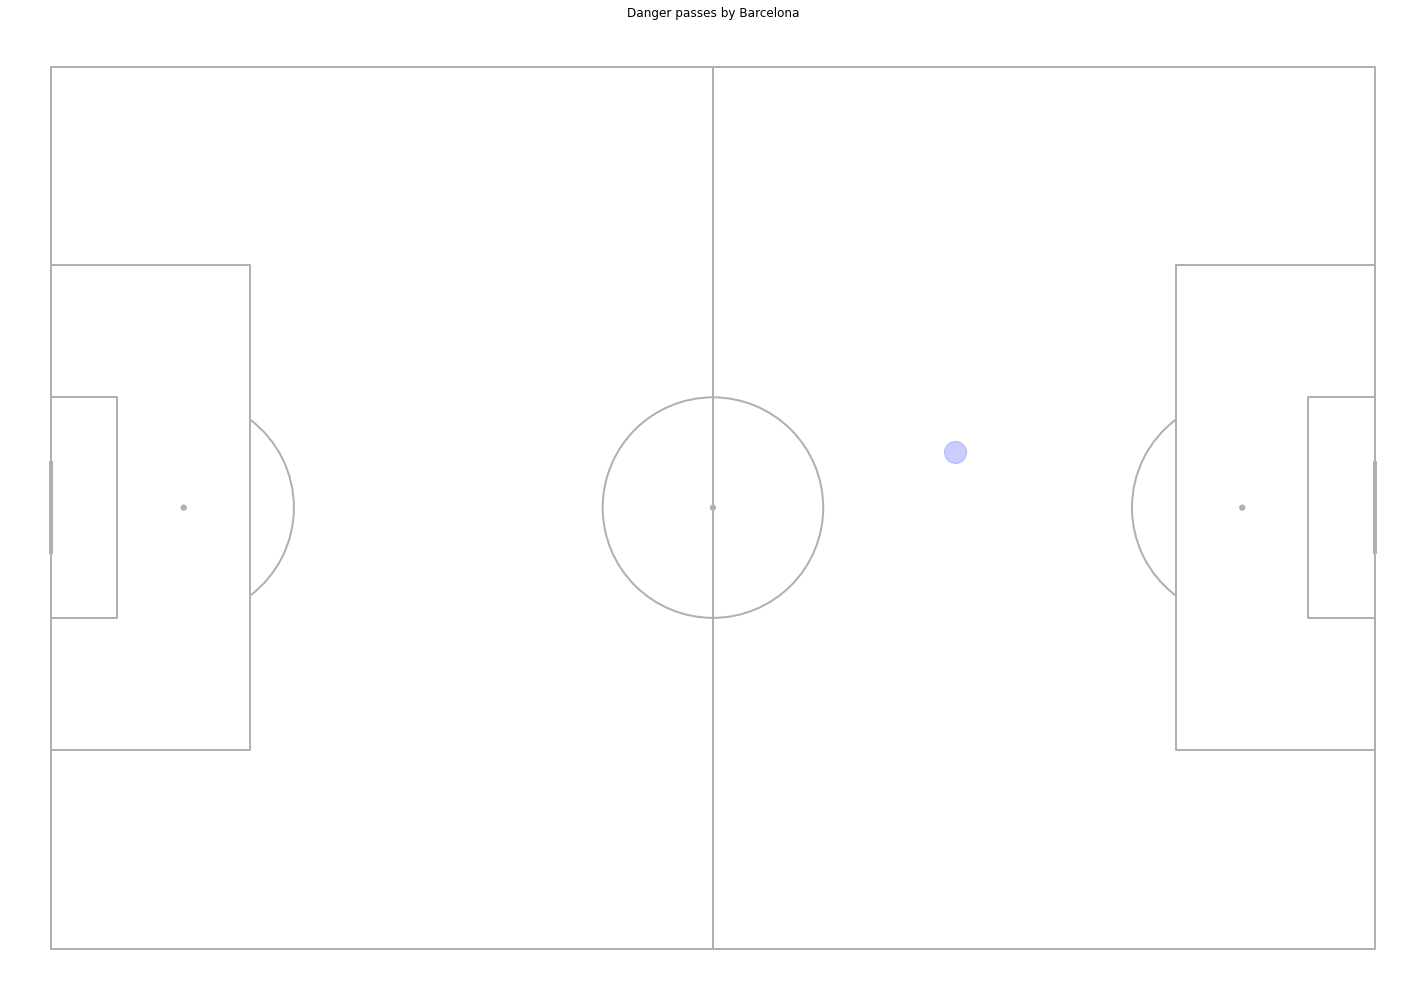

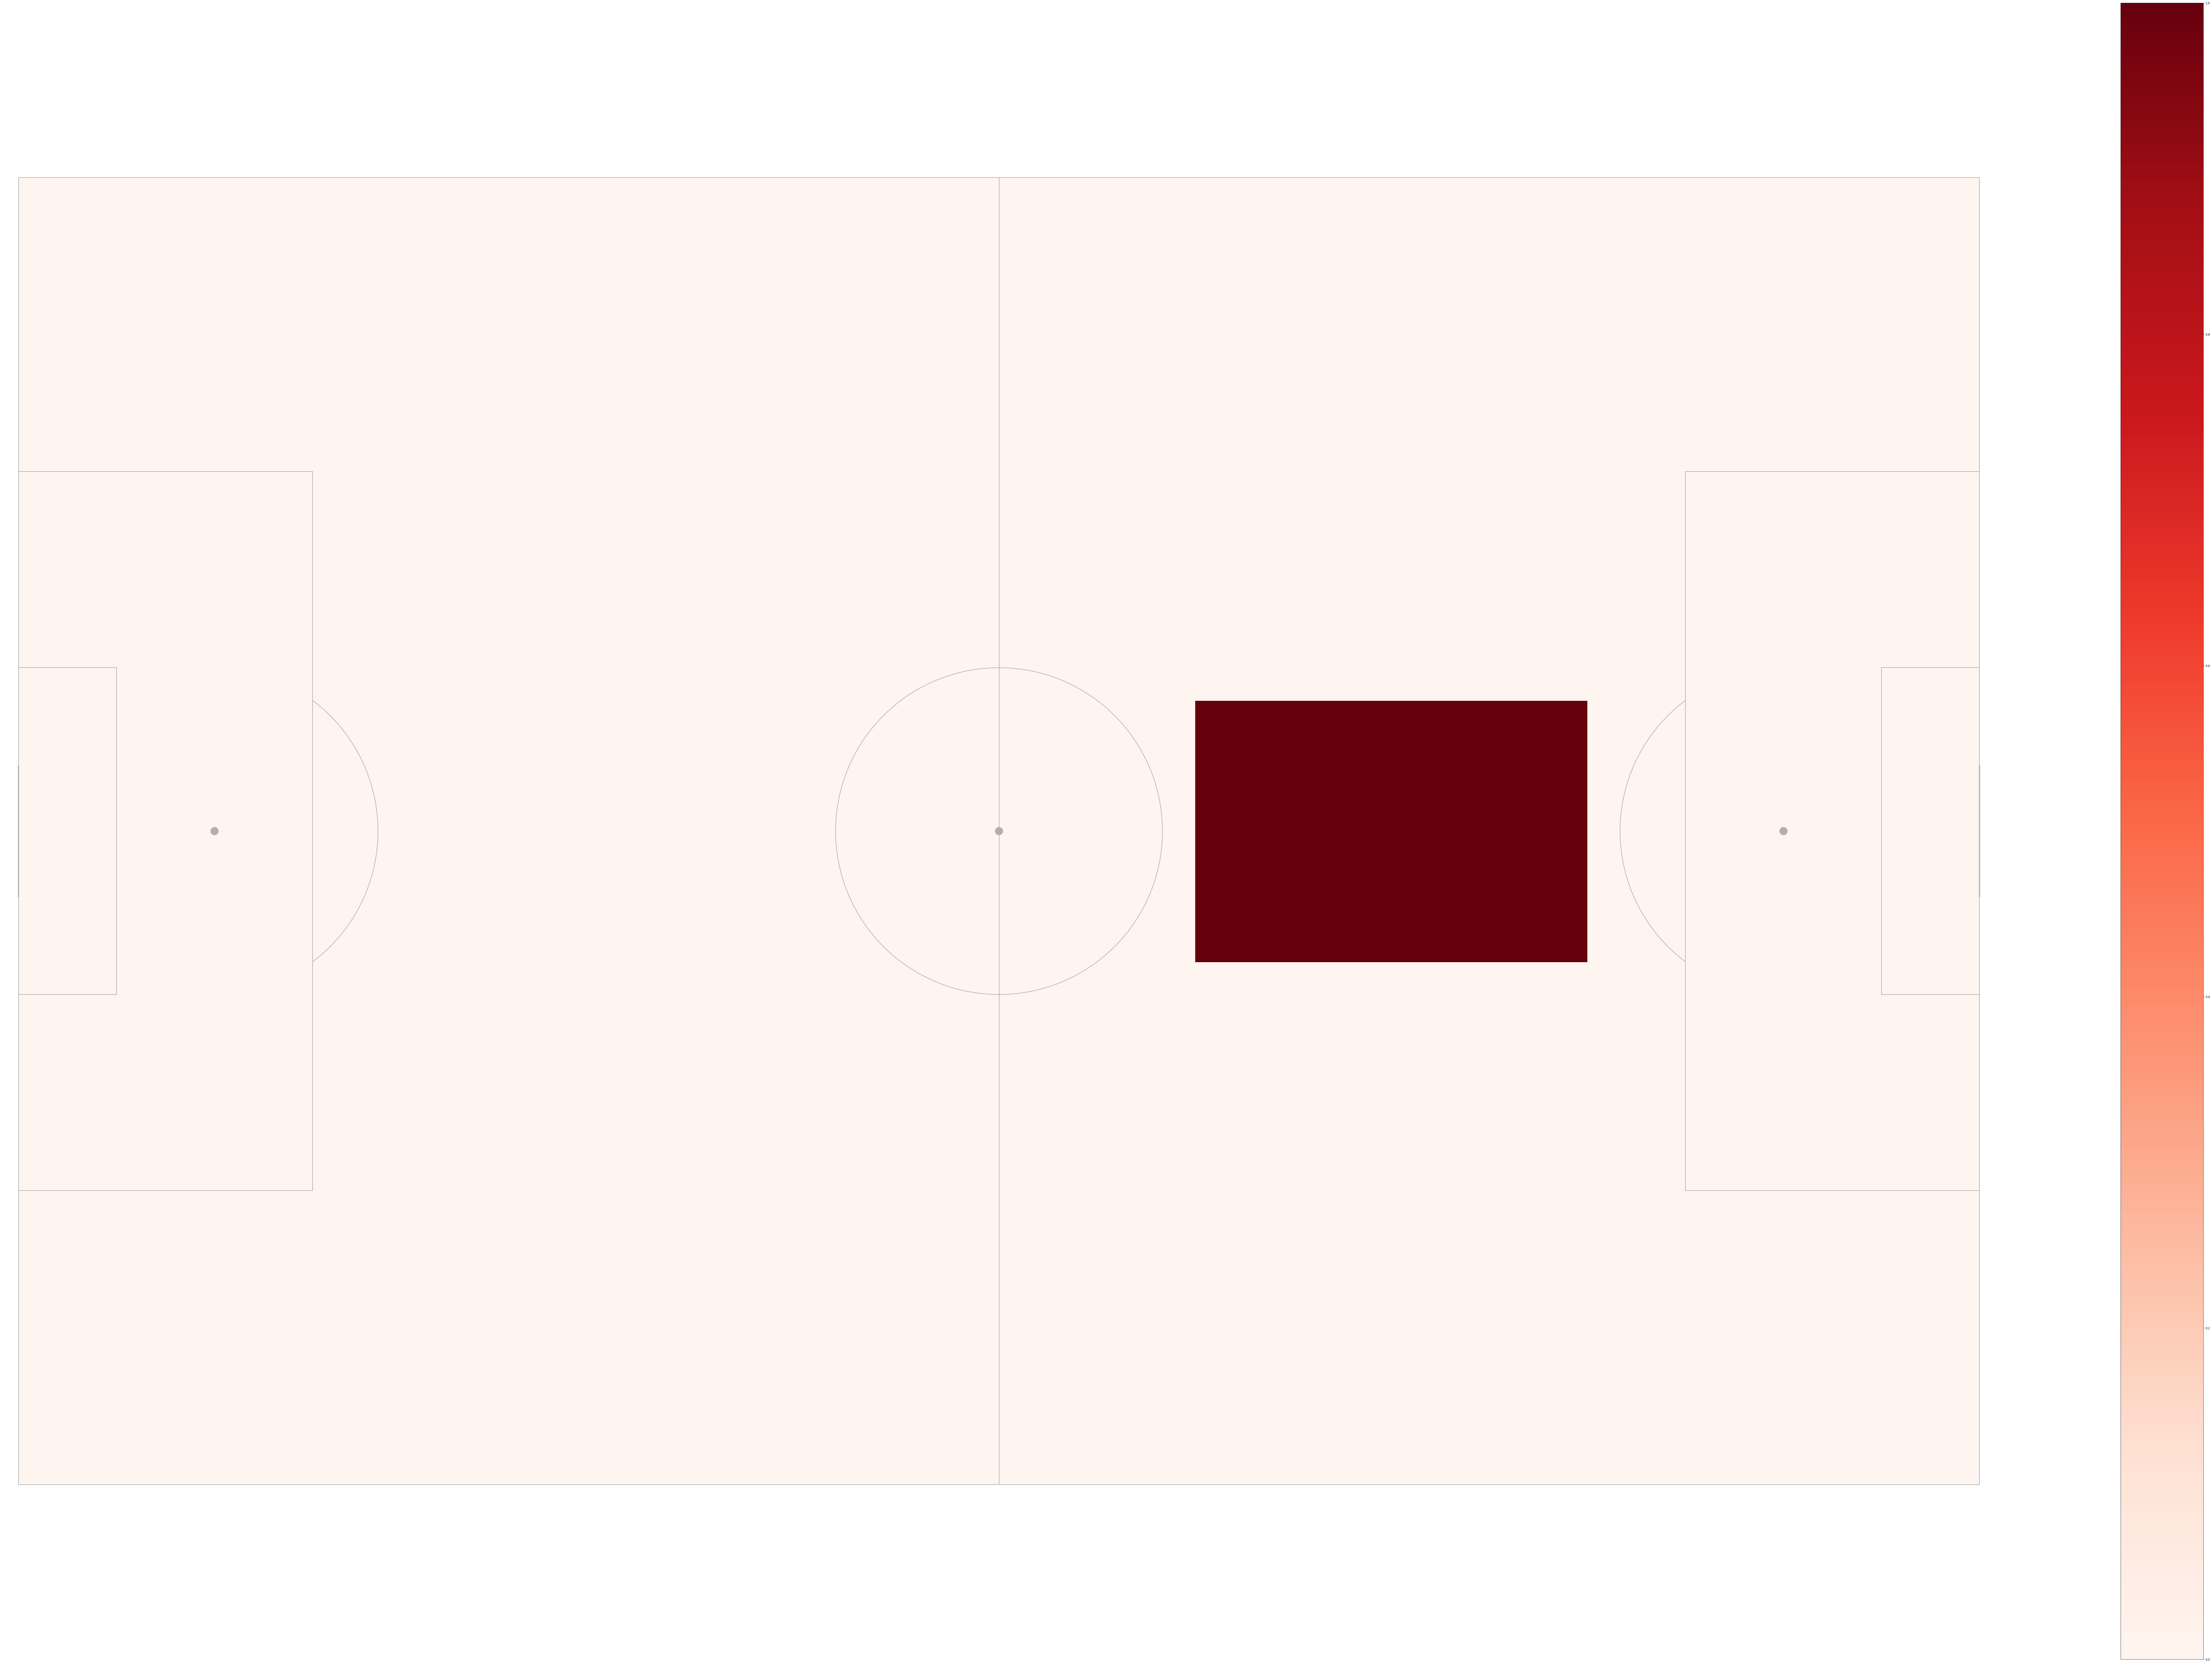

In [12]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('Danger passes by ' + team_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + team_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### All the passes & shots made by Player 

In [13]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    #A dataframe of passes
    passes_player = player_actions[player_actions['type'] == 'Pass'].set_index('id')
    number_passes = passes_player['type'].count().sum()
    
    # dataframe of shots
    shots_player = player_actions[player_actions['type'] == 'Shot'].set_index('id')
    number_shots = shots_player['type'].count().sum()

    
    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of passes are: ' + str(len(passes_player)))
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of shots are: ' + str(len(shots_player)))

Match: 18236: Xavier Hernández Creus The Number of passes are: 151
Match: 18236: Xavier Hernández Creus The Number of shots are: 3


## Plotting the passes location & heat map made by a Player

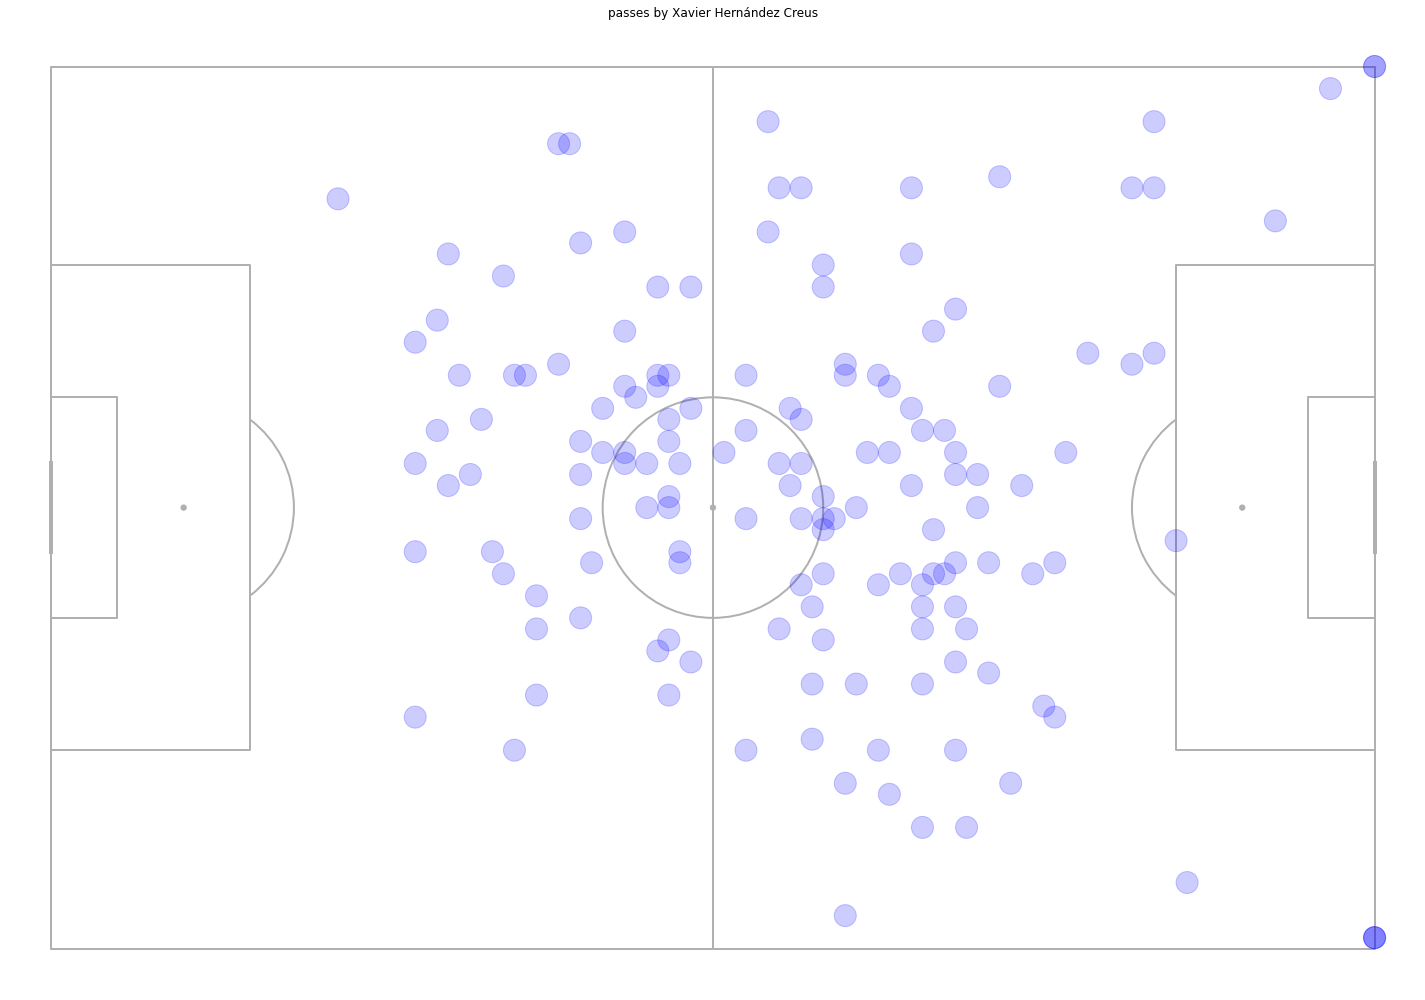

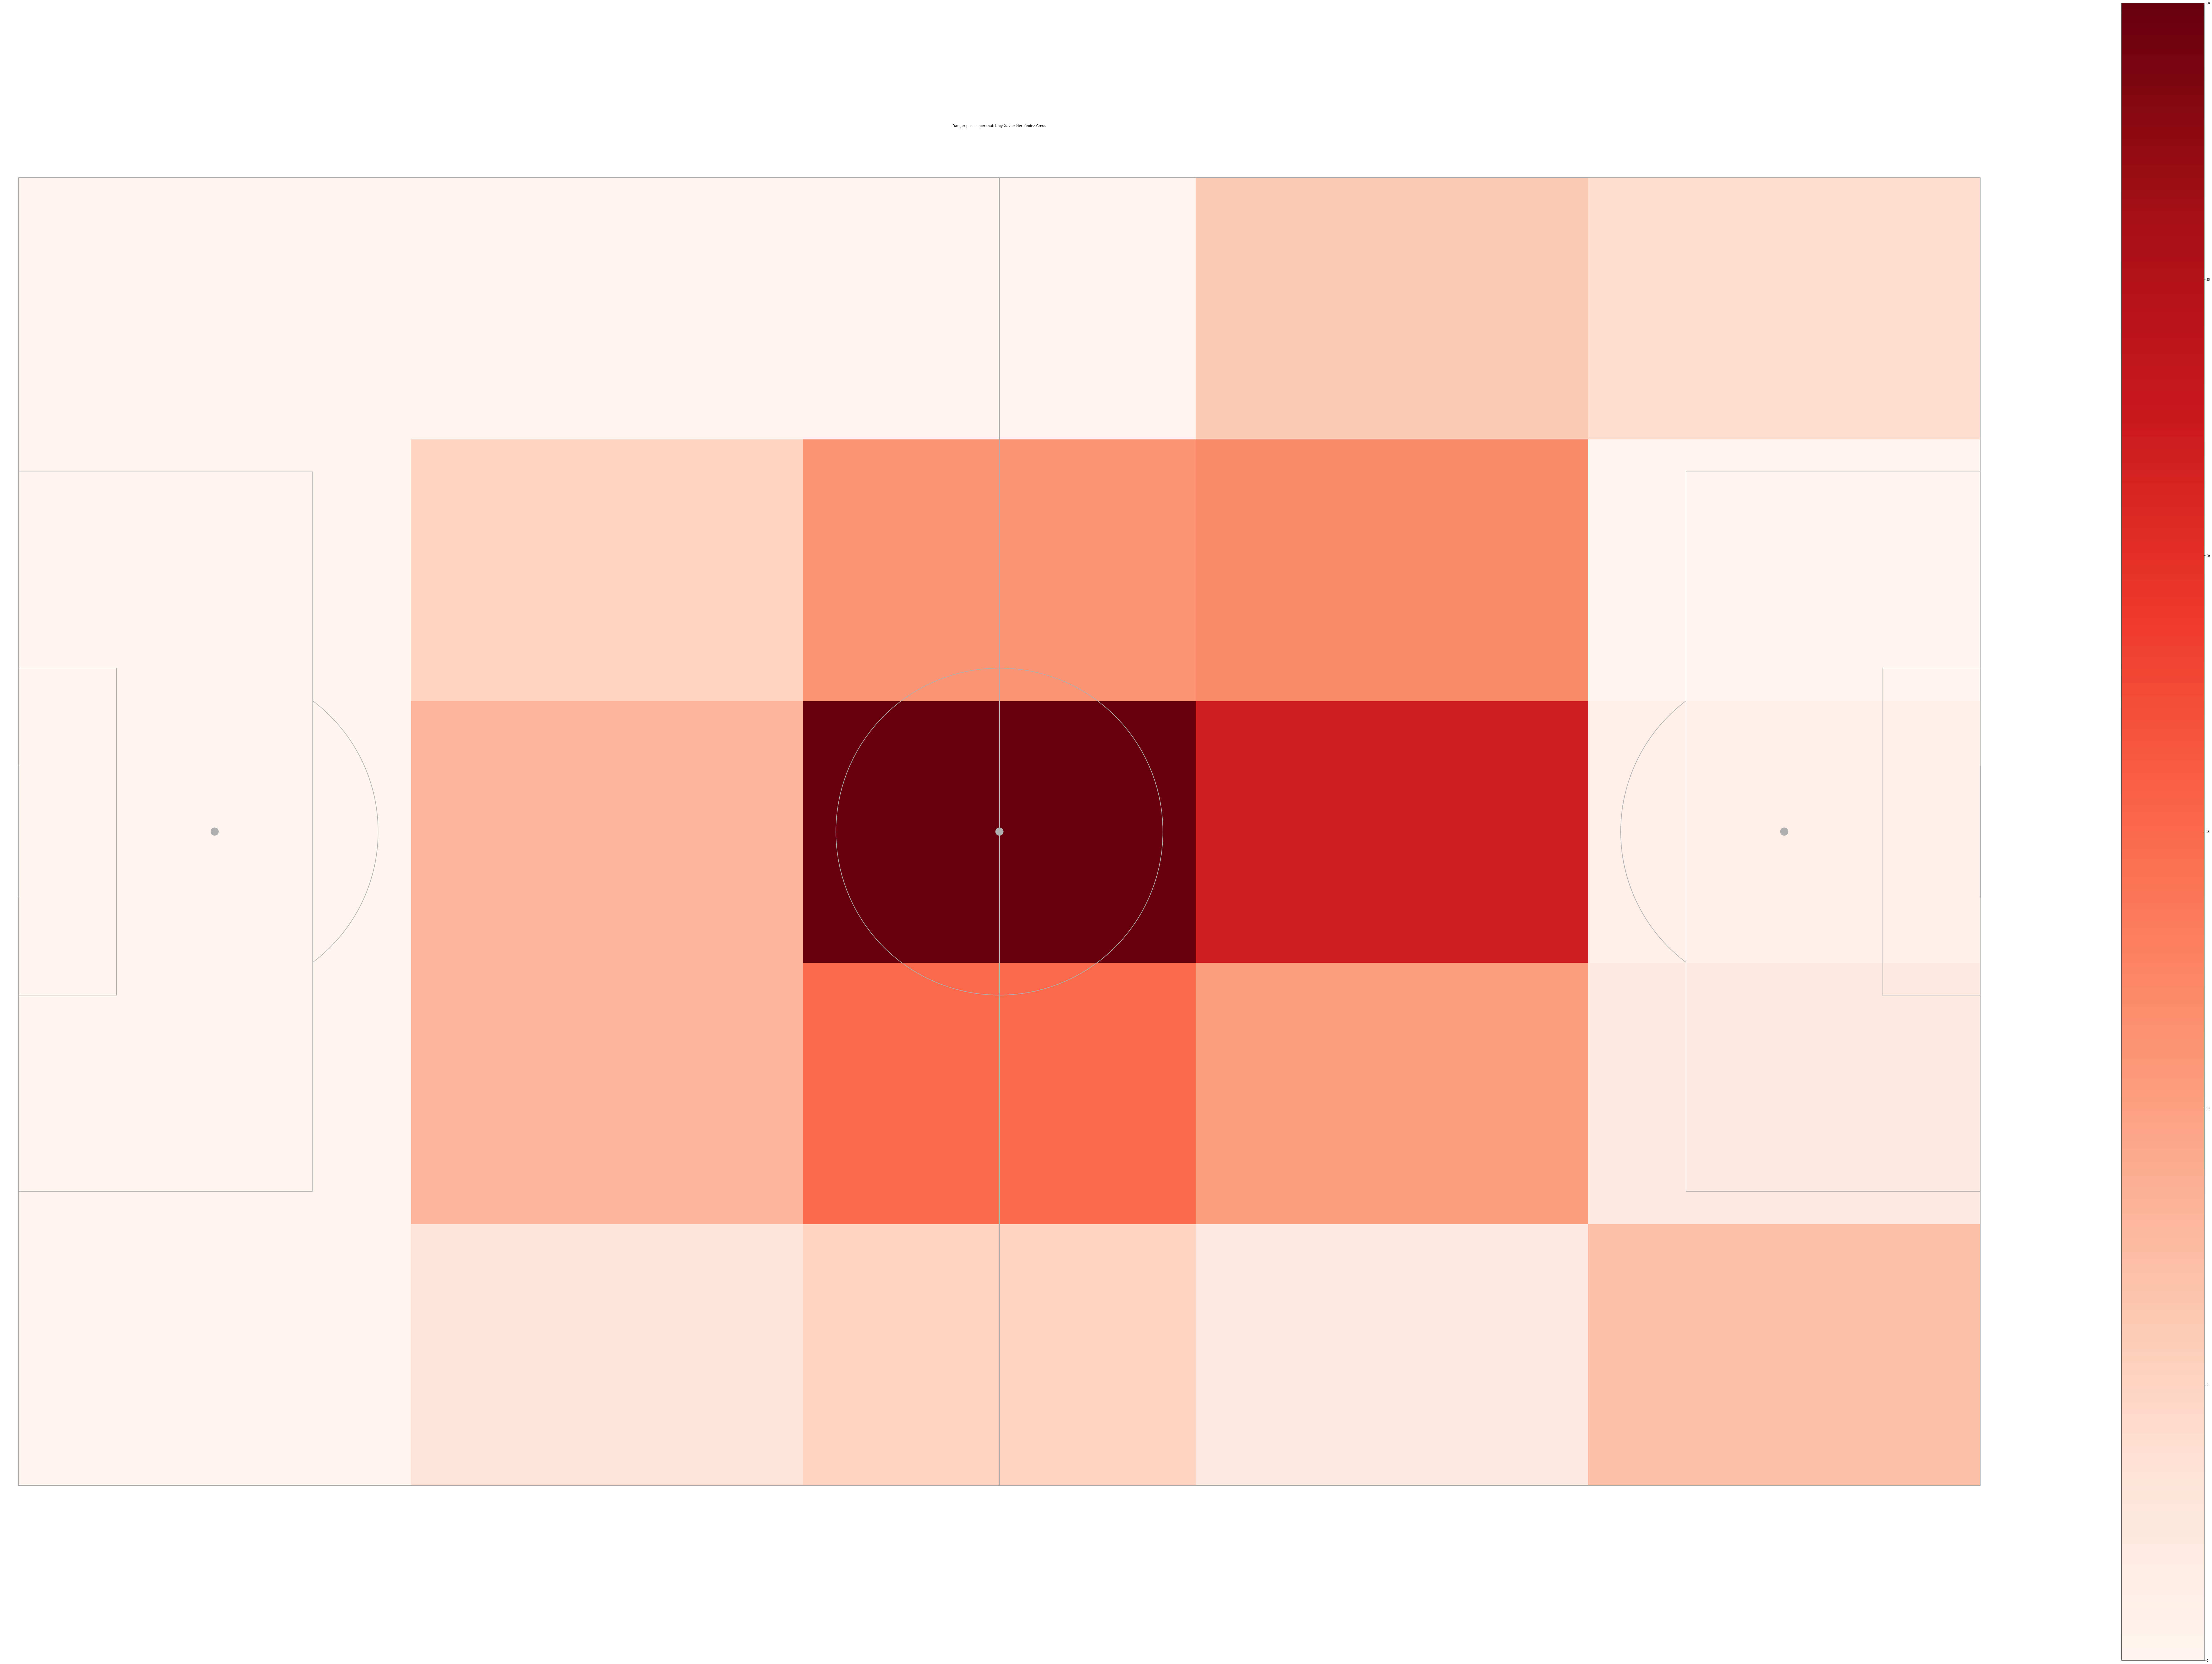

In [14]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes_player.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('passes by ' + player_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + player_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes_player.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Danger passes per match by ' + player_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Passes/Shots made under pressure

In [15]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    #A dataframe of passes
    passes_under_pressure = player_actions.loc[(player_actions['type'] == 'Pass') & (player_actions['under_pressure'] == True)] .set_index('id')
    number_passes = passes_under_pressure['type'].count().sum()
    
    # dataframe of shots
    shots_under_pressure = player_actions.loc[(player_actions['type'] == 'Shot') & (player_actions['under_pressure'] == True)].set_index('id')
    number_shots = shots_under_pressure['type'].count().sum()

    
    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of passes are: ' + str(len(passes_under_pressure)))
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of shots are: ' + str(len(shots_under_pressure)))


Match: 18236: Xavier Hernández Creus The Number of passes are: 21
Match: 18236: Xavier Hernández Creus The Number of shots are: 1


## Plotting all the passes made under pressure

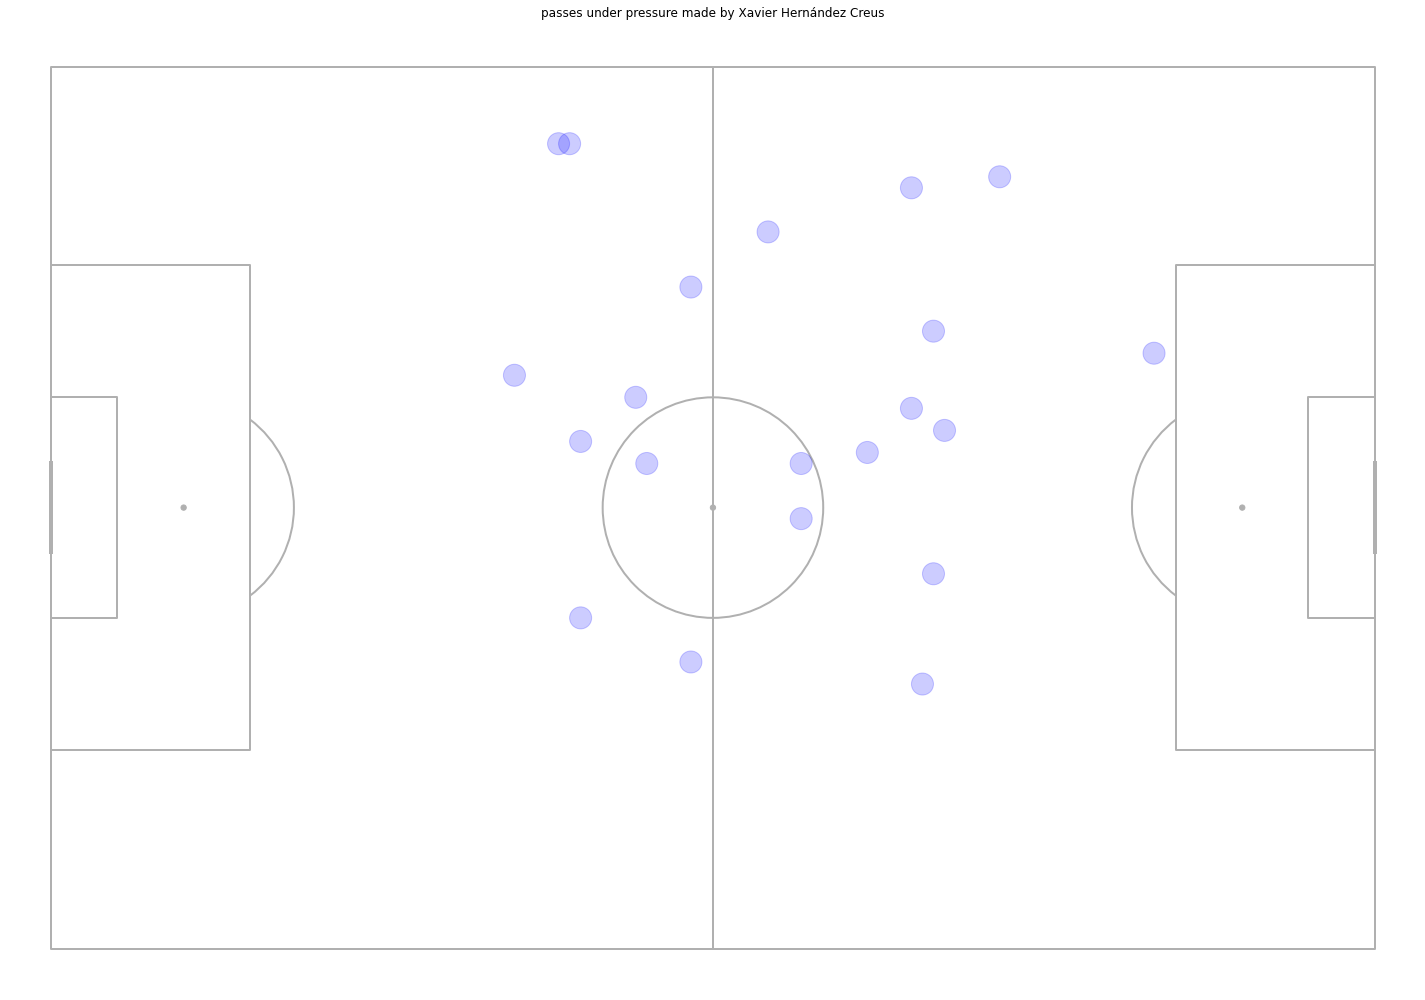

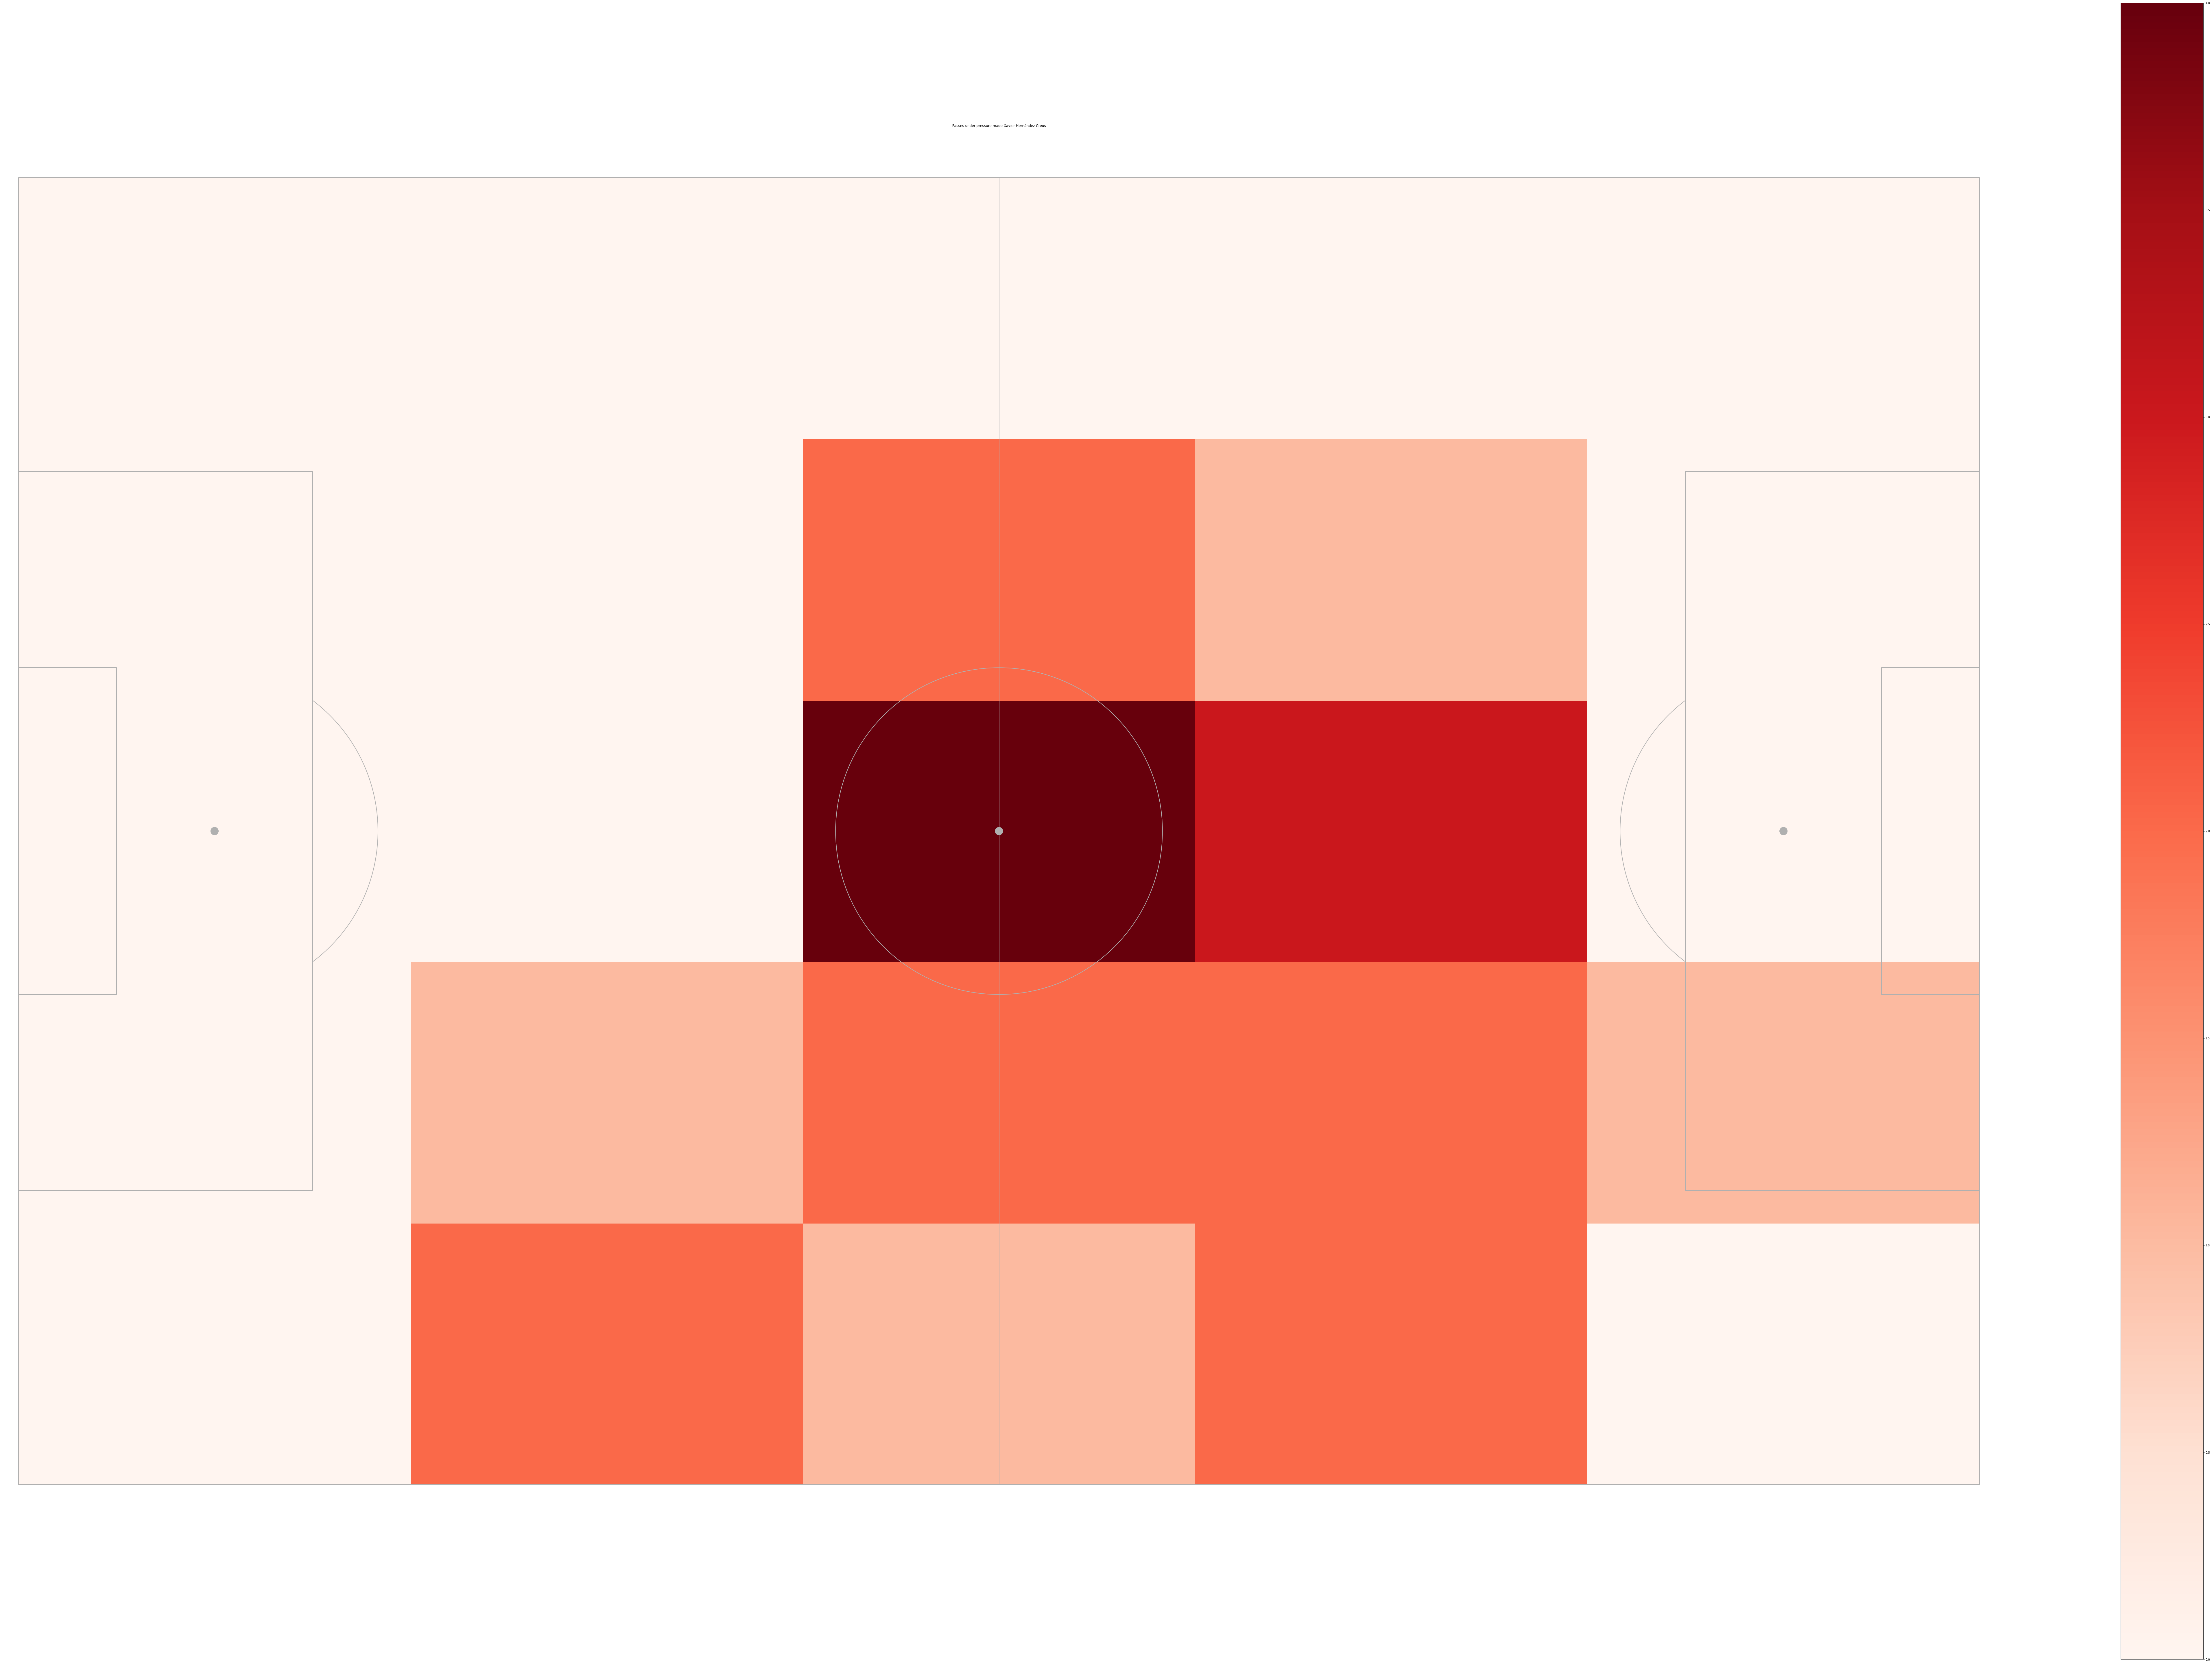

In [16]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes_under_pressure.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('passes under pressure made by ' + player_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + player_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes_under_pressure.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Passes under pressure made ' + player_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


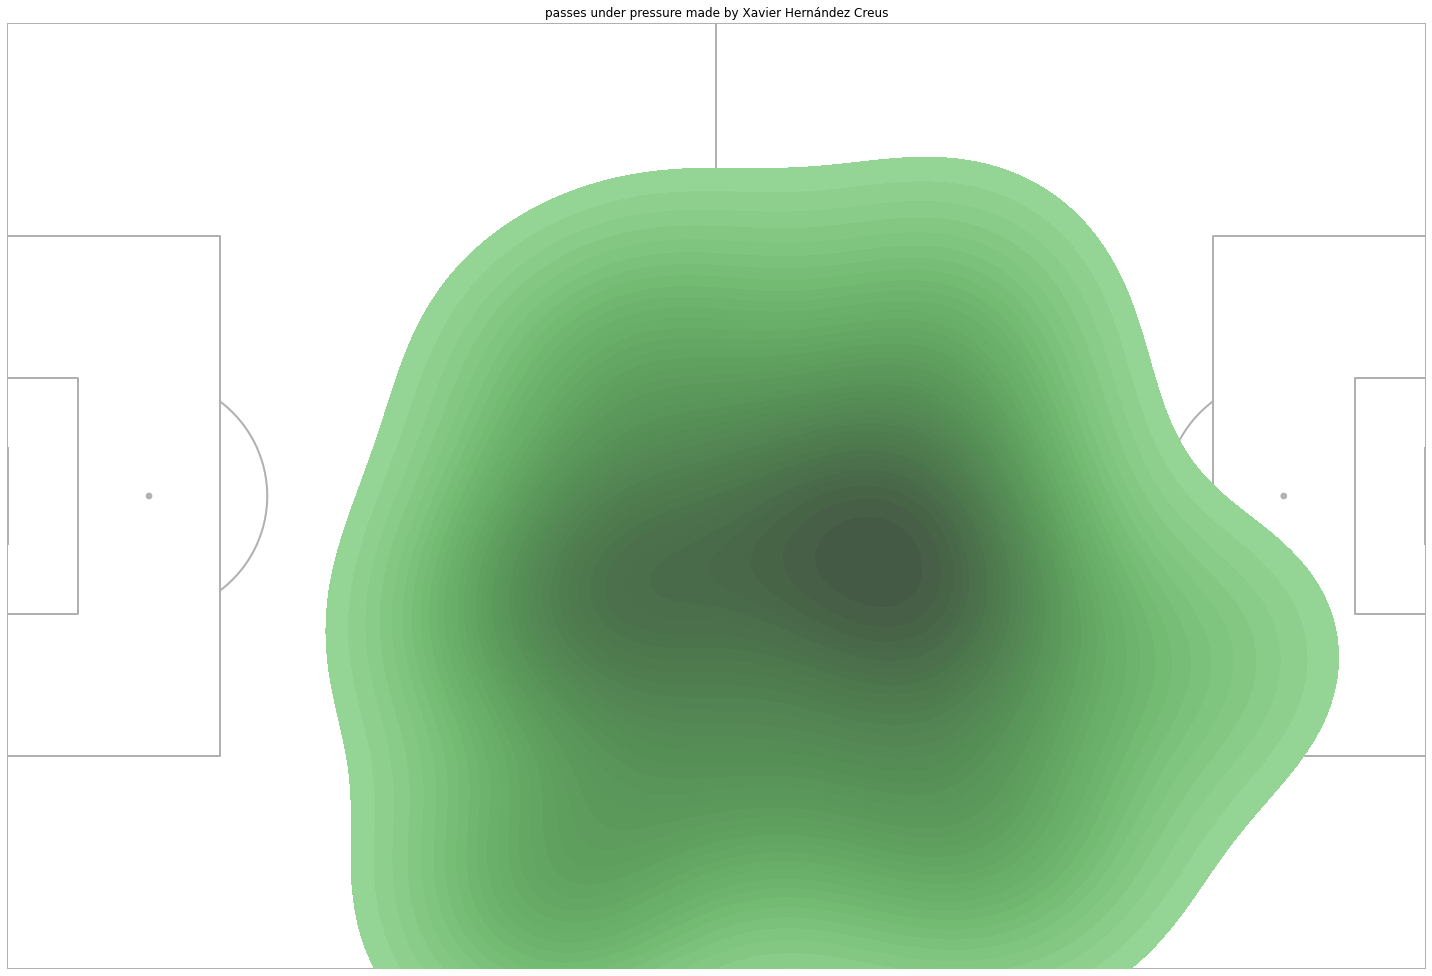

In [17]:
#Create figure
data = player_actions.loc[(player_actions['type'] == 'Pass') & (player_actions['under_pressure'] == True)]

Xstart=[]
Ystart=[]
for i,apass in data.iterrows():
    Xstart.append(apass['location'][0])
    Ystart.append(pitchWidthY-apass['location'][1])


#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))



#Tidy Axes
plt.axis('off')

sns.kdeplot(Xstart,Ystart, shade=True,n_levels=40, color = 'lightgreen')
plt.ylim(0, 80)
plt.xlim(0, 120)

ax.set_title('passes under pressure made by ' + player_required)
fig.set_size_inches(20, 14)

#Display Pitch
plt.show()